# Accessing FastFuels data using python api

### Dataset Description 
reference: https://fastfuels.io/

**FastFuels** is a tool for providing 3D vegetative fuels data to the next generation of wildfire simulation models. With FastFuels, you can quickly generate fuels data to meet the needs of prescribed fire management, silvicultural prescription design, scenario simulation, fire effects, and fire risk assessments.

- **Crown bulk density**
We use species group-specific crown geometry models and regional biomass equations to compute the mass and volume of individual tree crowns. Crown densities are modeled using the FIA database and mass is allocated to crowns to mimic realistic distribution of fuels

- **Surface area to volume ratio**
The ratio between the surface area of a fuel particle and its volume is an important factor determining fire propagation. We have an extensive library of species-specific surface area to volume ratios and we’re collecting more from researchers across the nation.

- **Dendrometrics**
Each tree in a FastFuels dataset is a measured unit from the FIA database. We maintain all dendrometric variables so they can be used to design and simulate silvicultural treatments. This makes it possible to compare alternative management actions.

- **Surface fuel loading**
FastFuels takes traditional fuel model grids and converts them to numerical representations required by 3D fire models. These surface fuel maps include fuel loading, fuelbed depth and surface area to volume ratio.

- **Topography**
Topographic features may help or hinder wildfire spread in the real world. These features matter in the simulation world too. FastFuels data has national coverage terrain data to provide the most accurate results for fire and wind simulations.

**Data attributes**
- bulk_density
- surface-area-to-volume (sav)
- moisture, 
- fuel_depth
- elevation

**Data format**
- numpy array

**Resolution**
- 1 m^3 voxel

### Installation

API reference:  https://pypi.org/project/fastfuels/

In [ ]:
# install FastFuels library (this notebook was tested using python 3.9)
!pip3 install fastfuels

In [1]:
import fastfuels
import matplotlib.pyplot as plt

### Connecting to a .fio resource

A .fio resource is a directory-in-file object where important metadata and fuel arrays are stored. You can open a .fio resource  stored remotely if you have the appropriate credentials.

In [2]:
fio = fastfuels.open('https://wifire-data.sdsc.edu:9000/fastfuels/index.fio', ftype='s3')
fio.cache_limit = 1e14

### Query the data

#### Let's choose a location to explore the dataset such as the Dixie Fire in Lassen National Forest 

In [3]:
# Dixie Fire location in Lassen National Forest (https://www.fire.ca.gov/incidents/2021/7/13/dixie-fire/) 
lat = 39.871306
lon = -121.389439

# this command will return a square kilometer of fuels (radius=500 meters)
roi = fio.query(lon, lat, 500)

Bounding box query found in single source: ca_set/ca_58.fio


### Explore the metadata

Let's take a look at some metadata. You can get the extent of the data in geographic coordinates (longitude and latitude) or in projected coordinates by changing the mode argument.

In [4]:
fio.get_extent(mode='geographic')

(-118.9394413210749, 23.665216128954086, -65.5757337104241, 47.772916723543815)

In [5]:
fio.get_extent(mode='projected')

(-2356173, 358137, 2258253, 3117712)

And the projection system is stored in the proj attribute.

In [6]:
fio.proj

'PROJCS["Albers_Conic_Equal_Area",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

#### You can also view metadata for resolution and units

In [7]:
fio.res

[1, 1, 1]

In [8]:
fio.units

'meters'

### Viewing fuels in 3D

Fuel parameter arrays can be viewed interactively in 3D. To see the available parameters run

In [9]:
roi.get_properties()

['bulk_density', 'sav', 'moisture', 'fuel_depth', 'elevation']

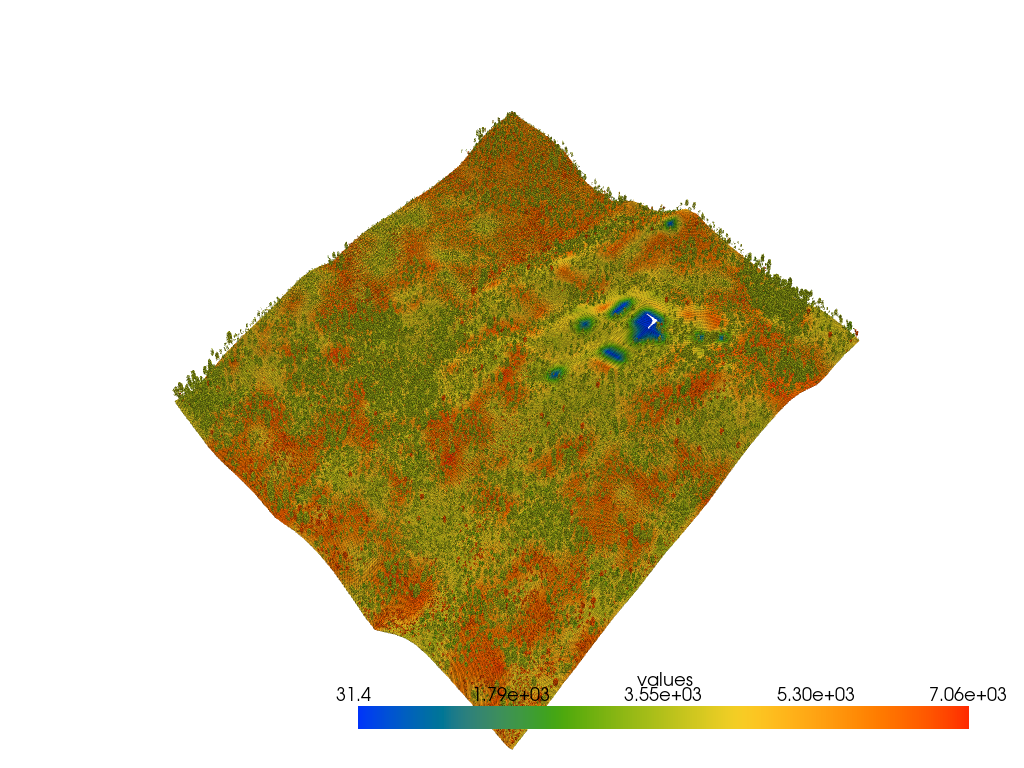

In [10]:
# sav = surface-area-to-volume
roi.view('sav', topography=True)

### let's look at the voxel data (each voxel is 1 m^3)

In [11]:
# we can access raw data using data dictionary, in this case using 'sav' attribute
raw_sav_data = roi.data_dict['sav']

In [12]:
raw_sav_data.shape

(1000, 1000, 128)

In [13]:
type(raw_sav_data)

numpy.ndarray

In [14]:
# here is surface data
raw_sav_data[:,:,0]

array([[5898.0396, 5898.0396, 5898.0396, ..., 4831.3726, 4862.745 ,
        4894.1177],
       [5898.0396, 5898.0396, 5898.0396, ..., 4800.    , 4831.3726,
        4862.745 ],
       [5898.0396, 5898.0396, 5898.0396, ..., 4768.6274, 4800.    ,
        4831.3726],
       ...,
       [4015.6865, 4015.6865, 4015.6865, ..., 4831.3726, 4768.6274,
        4705.8823],
       [4047.059 , 4047.059 , 4047.059 , ..., 4862.745 , 4800.    ,
        4737.255 ],
       [4078.4316, 4078.4316, 4078.4316, ..., 4894.1177, 4862.745 ,
        4800.    ]], dtype=float32)

### let's visualize this data

Text(0.5, 1.0, 'Surface-area-to-volume(sav) for Dixie Fire in in Lassen National Forest')

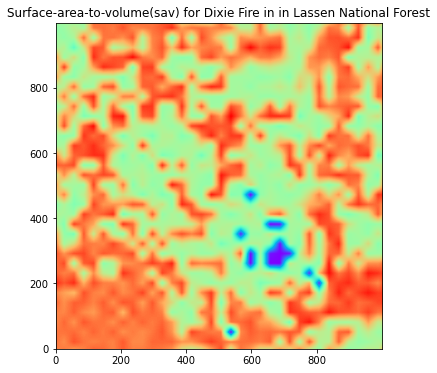

In [15]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(raw_sav_data[:,:,0], cmap='rainbow', origin="lower")
ax.set_title('Surface-area-to-volume(sav) for Dixie Fire in in Lassen National Forest')

### Additional references

- https://burnpro3d.sdsc.edu/
- https://wifire-data.sdsc.edu/
- https://www.firelab.org/project/fastfuels-3d-fuels-next-generation-fire-models
- FastFuels Example Data demo: https://www.firelab.org/media/911
- FastFuels-QuicFire demo: https://www.firelab.org/media/912

- Fuelmap: https://fuelmap.sdsc.edu/
- https://fastfuels.io/